# Downloading MNIST Data

In [1]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [2]:
mnist.data.iloc[0]

pixel1      0.0
pixel2      0.0
pixel3      0.0
pixel4      0.0
pixel5      0.0
           ... 
pixel780    0.0
pixel781    0.0
pixel782    0.0
pixel783    0.0
pixel784    0.0
Name: 0, Length: 784, dtype: float64

# Messing with MNIST

In [3]:
X, y = mnist['data'], mnist['target']
print(f'X shape: {X.shape}\ty shape: {y.shape}')

X shape: (70000, 784)	y shape: (70000,)


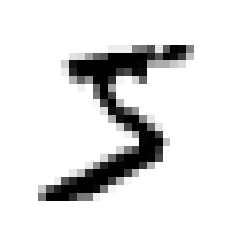

5

In [4]:
# to visualise what are all these numbers we do this
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

# converting labels from character to integer
y = y.astype(np.uint8)
y.iloc[0]

sample_digit = np.array(X.iloc[0])
sample_digit_image = sample_digit.reshape(28, 28)
sample_digit_label = y.iloc[0]

plt.imshow(sample_digit_image, cmap=mpl.cm.binary, interpolation='nearest')
plt.axis('off')
plt.show()
sample_digit_label

In [5]:
# splitting the data (Mnist data is already shuffled so we don't need to shuffle it again.)
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

# Training a Binary Classifier

Let’s simplify the problem for now and only try to identify one digit—for example,
the number 5. This “5-detector” will be an example of a binary classifier, capable of
distinguishing between just two classes, 5 and not-5.

In [6]:
y_train5 = (y_train == 5)
y_test5 = (y_test == 5)
y_train5[:5]

0     True
1    False
2    False
3    False
4    False
Name: class, dtype: bool

In [7]:
# First lets try Stochastic Gradient Descent Classifier (SGD)
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(random_state=42, shuffle=True)
sgd.fit(X_train, y_train5)

SGDClassifier(random_state=42)

In [8]:
print(f'Prediction: {sgd.predict([sample_digit])}\tActual: {sample_digit_label==5} ')

Prediction: [ True]	Actual: True 


In [9]:
X_train

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
# Performance Measures
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone


skfolds = StratifiedKFold(n_splits=3, random_state=42, shuffle=True)

for train_index, test_index in skfolds.split(X_train, y_train5):
    X_train_folds = X_train.iloc[train_index]
    y_train_folds = y_train5.iloc[train_index]
    X_test_folds = X_train.iloc[test_index]
    y_test_folds = y_train5.iloc[test_index]
    
    clone_clf = clone(sgd)
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_folds)
    n_correct = sum(y_pred == y_test_folds)
    print(f'Correct: {n_correct}, Accuracy: {n_correct/len(y_pred)} ')

Correct: 19338, Accuracy: 0.9669 
Correct: 18325, Accuracy: 0.91625 
Correct: 19357, Accuracy: 0.96785 


In [11]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd, X_train, y_train5, cv=3, scoring='accuracy')

array([0.95035, 0.96035, 0.9604 ])

* Is this accuracy good?
* Lets say we have a classifier which says "not five" for every single input.
* How much accuracy we ll get, lets see.


In [12]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [13]:
never5_clf = Never5Classifier()
cross_val_score(never5_clf, X_train, y_train5, cv=3, scoring='accuracy')

array([0.91125, 0.90855, 0.90915])

We get so high accuracy because there are only 10% 5s in the data. Even we say everything is "not five" we got super high accuracy. That's why accuracy is not a good measurement technique for most of the time.

## Confusion Matrix

Confusion matrices includes much more valueable information than just accuracy.

In [14]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd, X_train, y_train5, cv=3)

In [15]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

In [16]:
from sklearn.metrics import precision_score, recall_score

print(f'Precision: {precision_score(y_train5, y_train_pred)}\n\
Recall: {recall_score(y_train5, y_train_pred)}')

Precision: 0.8370879772350012
Recall: 0.6511713705958311


* It is often convenient to combine precision and recall into a single metric called the F1
score, in particular if you need a simple way to compare two classifiers. The F1
score is the harmonic mean of precision and recall. Whereas the regular mean
treats all values equally, the harmonic mean gives much more weight to low values.
As a result, the classifier will only get a high F1 score if both recall and precision are
high.
* ![F1 Score (Harmonic Mean)](etc/F1Score.jpg)

In [17]:
from sklearn.metrics import f1_score
f1_score(y_train5, y_train_pred)

0.7325171197343846

Precision Recall Tradeoff:

In [18]:
some_digit_5 = X_test.iloc[15]
some_digit_not5 = X_test.iloc[14]

In [19]:
y_scores = sgd.decision_function([some_digit_5, some_digit_not5])
print(y_scores)

[ 2609.52400822 -4511.10196769]


In [20]:
# default threshold is 0
# lets set it to 5000
threshold = 5000
th_5000_predicts = y_scores > threshold
th_5000_predicts

array([False, False])

Now lets see how can we determine the threshold value.

In [21]:
y_scores = cross_val_predict(sgd, X_train, y_train5, cv=3, method='decision_function')

Now with these scores you can compute precision and recall for all possible thresholds using the precision_recall_curve() function.

In [22]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train5, y_scores)

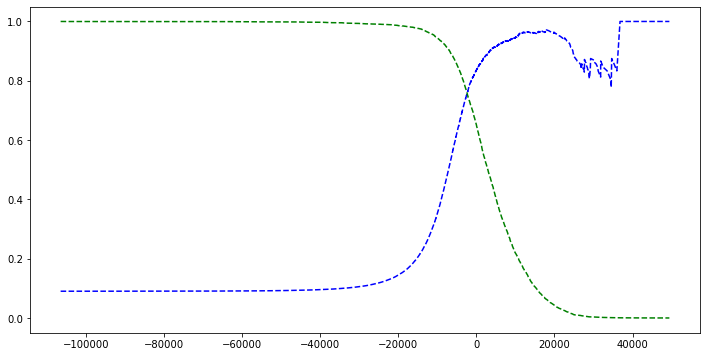

In [23]:
def plot_precision_recall_curve(precisions, recalls, thresholds):
    plt.figure(figsize=(12, 6))
    plt.plot(thresholds, precisions[:-1], 'b--', label='Precision')
    plt.plot(thresholds, recalls[:-1], 'g--', label='Recall')
    plt.show()

plot_precision_recall_curve(precisions, recalls, thresholds)

In [24]:
threshold_90precision = thresholds[np.argmax(precisions >= 0.9)]
threshold_90precision

3370.019499143957

In [25]:
y_train_pred90 = y_scores > threshold_90precision

In [26]:
print(precision_score(y_train5, y_train_pred90))
print(recall_score(y_train5, y_train_pred90))

0.9
0.47980077476480354


In [27]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train5, y_scores)

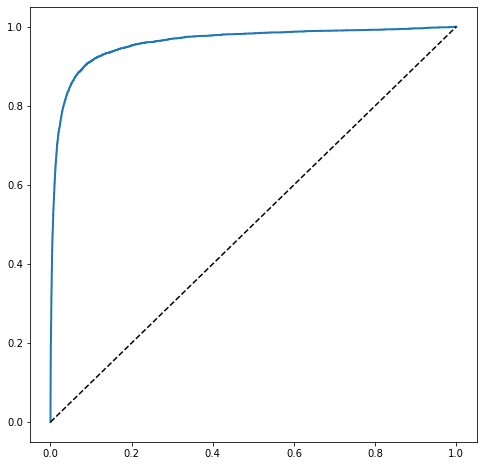

In [28]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.figure(figsize=(8, 8))
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')

plot_roc_curve(fpr, tpr)

In [29]:
y_scores

array([  1200.93051237, -26883.79202424, -33072.03475406, ...,
        13272.12718981,  -7258.47203373, -16877.50840447])

In [30]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train5, y_scores)

0.9604938554008616

Since the ROC curve is so similar to the precision/recall (or PR)
curve, you may wonder how to decide which one to use. As a rule
of thumb, you should prefer the PR curve whenever the positive
class is rare or when you care more about the false positives than
the false negatives, and the ROC curve otherwise. For example,
looking at the previous ROC curve (and the ROC AUC score), you
may think that the classifier is really good. But this is mostly
because there are few positives (5s) compared to the negatives
(non-5s). In contrast, the PR curve makes it clear that the classifier
has room for improvement (the curve could be closer to the topright corner).

In [31]:
"""Let’s train a RandomForestClassifier and compare its 
ROC curve and ROC AUC score to the SGDClassifier."""

from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train5, cv=3, method='predict_proba')

In [32]:
y_probas_forest[:5]

array([[0.11, 0.89],
       [0.99, 0.01],
       [0.96, 0.04],
       [1.  , 0.  ],
       [0.99, 0.01]])

In [33]:
y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train5, y_scores_forest)

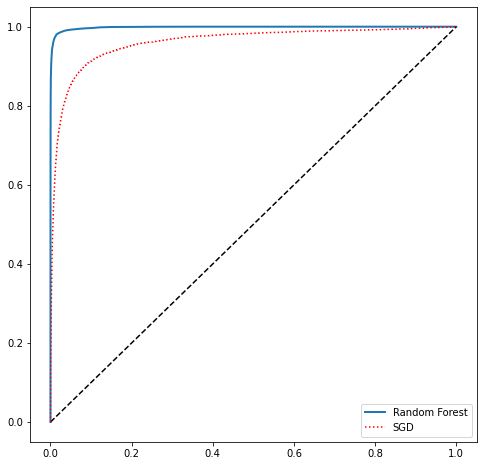

In [34]:
plot_roc_curve(fpr_forest, tpr_forest, 'Random Forest')
plt.plot(fpr, tpr, "r:", label='SGD')
plt.legend(loc='lower right')
plt.show()

In [35]:
roc_auc_score(y_train5, y_scores_forest)

0.9983436731328145

# Multiclass Classification

For example, one way to create a system that can classify the digit images into 10
classes (from 0 to 9) is to train 10 binary classifiers, one for each digit (a 0-detector, a
1-detector, a 2-detector, and so on). Then when you want to classify an image, you get
the decision score from each classifier for that image and you select the class whose
classifier outputs the highest score. This is called the one-versus-all (OvA) strategy
(also called one-versus-the-rest).

Another strategy is to train a binary classifier for every pair of digits: one to distinguish 0s and 1s, another to distinguish 0s and 2s, another for 1s and 2s, and so on.
This is called the one-versus-one (OvO) strategy. If there are N classes, you need to
train N × (N – 1) / 2 classifiers. For the MNIST problem, this means training 45
binary classifiers! When you want to classify an image, you have to run the image
through all 45 classifiers and see which class wins the most duels. The main advan‐
tage of OvO is that each classifier only needs to be trained on the part of the training
set for the two classes that it must distinguish.


Scikit-Learn detects when you try to use a binary classification algorithm for a multiclass classification task, and it automatically runs OvA (except for SVM classifiers for
which it uses OvO). Let’s try this with the SGDClassifier:

In [36]:
sgd.fit(X_train, y_train)

SGDClassifier(random_state=42)

In [37]:
print(sgd.predict([X_test.iloc[0]]), y_test.iloc[0])
print(sgd.predict([X_test.iloc[10]]), y_test.iloc[10])

[7] 7
[0] 0


In [38]:
some_digit_scores = sgd.decision_function([X_test.iloc[0]])
some_digit_scores

array([[-27972.77566096, -52417.77039463, -14344.98217961,
         -1308.44575644, -19922.84531732,  -9208.91066356,
        -38331.13646795,   8007.54256279,  -4273.31795296,
         -5951.32911022]])

In [39]:
sgd.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

If you want to force ScikitLearn to use one-versus-one or one-versus-all, you can use
the OneVsOneClassifier or OneVsRestClassifier classes. Simply create an instance
and pass a binary classifier to its constructor. For example, this code creates a multiclass classifier using the OvO strategy, based on a SGDClassifier:

In [40]:
from sklearn.multiclass import OneVsOneClassifier

ovo = OneVsOneClassifier(SGDClassifier(random_state=42))
ovo.fit(X_train, y_train)

print(ovo.predict([X_test.iloc[0]]), y_test.iloc[0])
print(ovo.predict([X_test.iloc[10]]), y_test.iloc[10])

[7] 7
[0] 0


In [41]:
len(ovo.estimators_)

45

In [42]:
# training random forest clf is easy too
forest_clf.fit(X_train, y_train)
print(forest_clf.predict([X_test.iloc[0]]), y_test.iloc[0])
print(forest_clf.predict([X_test.iloc[10]]), y_test.iloc[10])

[7] 7
[0] 0


In [43]:
forest_clf.predict_proba(X_test.iloc[:5])

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  ],
       [0.01, 0.01, 0.85, 0.06, 0.  , 0.01, 0.04, 0.  , 0.02, 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.96, 0.  , 0.  , 0.  , 0.02, 0.  , 0.01, 0.  , 0.  , 0.01],
       [0.  , 0.  , 0.  , 0.  , 0.94, 0.  , 0.  , 0.02, 0.  , 0.04]])

In [44]:
cross_val_score(sgd, X_train, y_train, cv=3, scoring='accuracy')

array([0.87365, 0.85835, 0.8689 ])

It gets over 84% on all test folds. If you used a random classifier, you would get 10%
accuracy, so this is not such a bad score, but you can still do much better. For example, simply scaling the inputs (as discussed in Chapter 2) increases accuracy above
89%

In [46]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
y_train_pred = cross_val_score(sgd, X_train_scaled, y_train, cv=3, scoring='accuracy')

In [53]:
y_train_pred = cross_val_predict(sgd, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5577,    0,   22,    5,    8,   43,   36,    6,  225,    1],
       [   0, 6400,   37,   24,    4,   44,    4,    7,  212,   10],
       [  27,   27, 5220,   92,   73,   27,   67,   36,  378,   11],
       [  22,   17,  117, 5227,    2,  203,   27,   40,  403,   73],
       [  12,   14,   41,    9, 5182,   12,   34,   27,  347,  164],
       [  27,   15,   30,  168,   53, 4444,   75,   14,  535,   60],
       [  30,   15,   42,    3,   44,   97, 5552,    3,  131,    1],
       [  21,   10,   51,   30,   49,   12,    3, 5684,  195,  210],
       [  17,   63,   48,   86,    3,  126,   25,   10, 5429,   44],
       [  25,   18,   30,   64,  118,   36,    1,  179,  371, 5107]],
      dtype=int64)

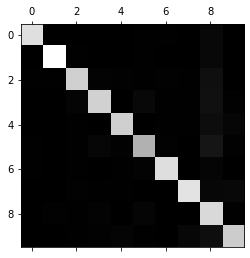

In [54]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

In [55]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

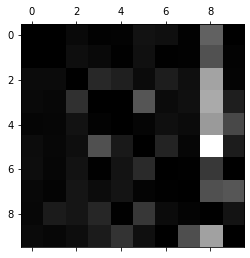

In [56]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

NameError: name 'plt_digits' is not defined

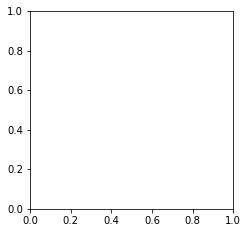

In [57]:
cl_3, cl_5 = 3, 5
X_33 = X_train[(y_train == cl_3) & (y_train_pred == cl_3)]
X_35 = X_train[(y_train == cl_3) & (y_train_pred == cl_5)]
X_55 = X_train[(y_train == cl_5) & (y_train_pred == cl_5)]
X_53 = X_train[(y_train == cl_5) & (y_train_pred == cl_3)]

plt.figure(figsize=(8, 8))
plt.subplot(221); plt_digits(X_33[:25], imager_per_row=5)
plt.subplot(222); plt_digits(X_35[:25], imager_per_row=5)
plt.subplot(223); plt_digits(X_55[:25], imager_per_row=5)
plt.subplot(224); plt_digits(X_53[:25], imager_per_row=5)

# Multilabel Classification

In [59]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier()

In [69]:
knn_clf.predict(X_train.iloc[:10])

array([[False,  True],
       [False, False],
       [False, False],
       [False,  True],
       [ True,  True],
       [False, False],
       [False,  True],
       [False,  True],
       [False,  True],
       [False, False]])